In [1]:
 '''
 Práctica 2 
 '''
    
#Bibliotecas
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft
from scipy.signal.windows import hann, gaussian, exponential, chebwin
from scipy import signal 


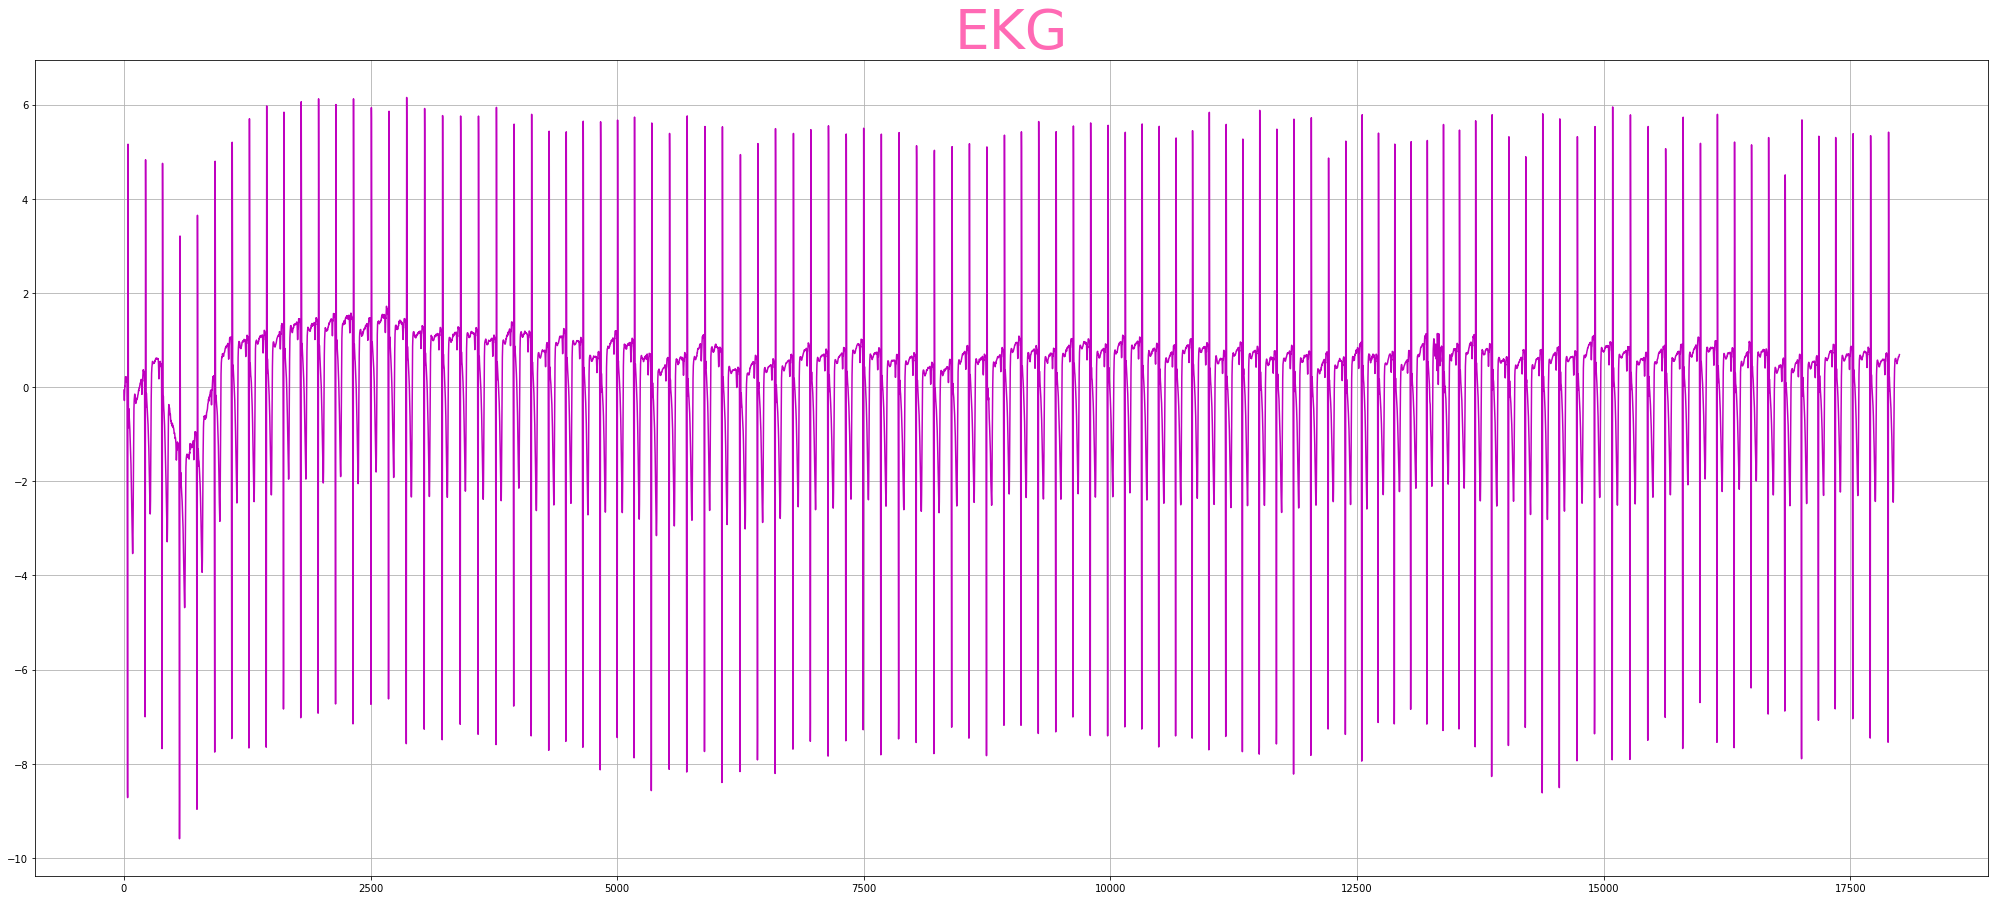

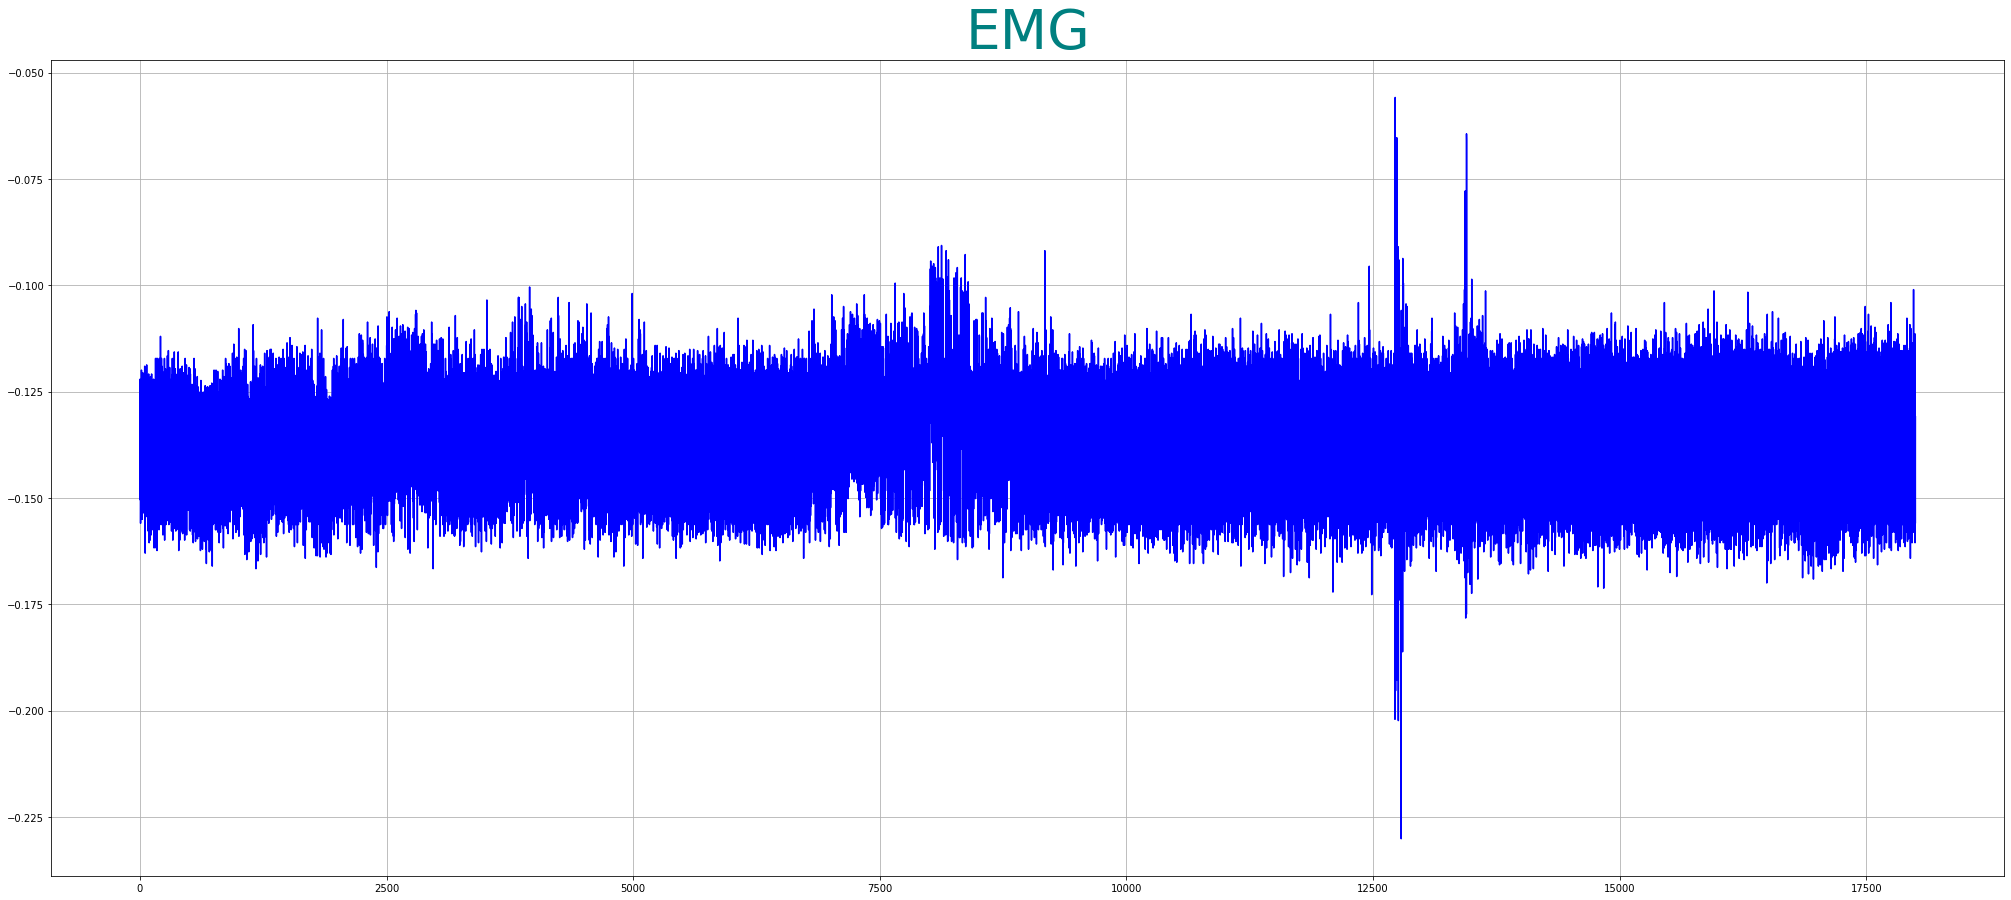

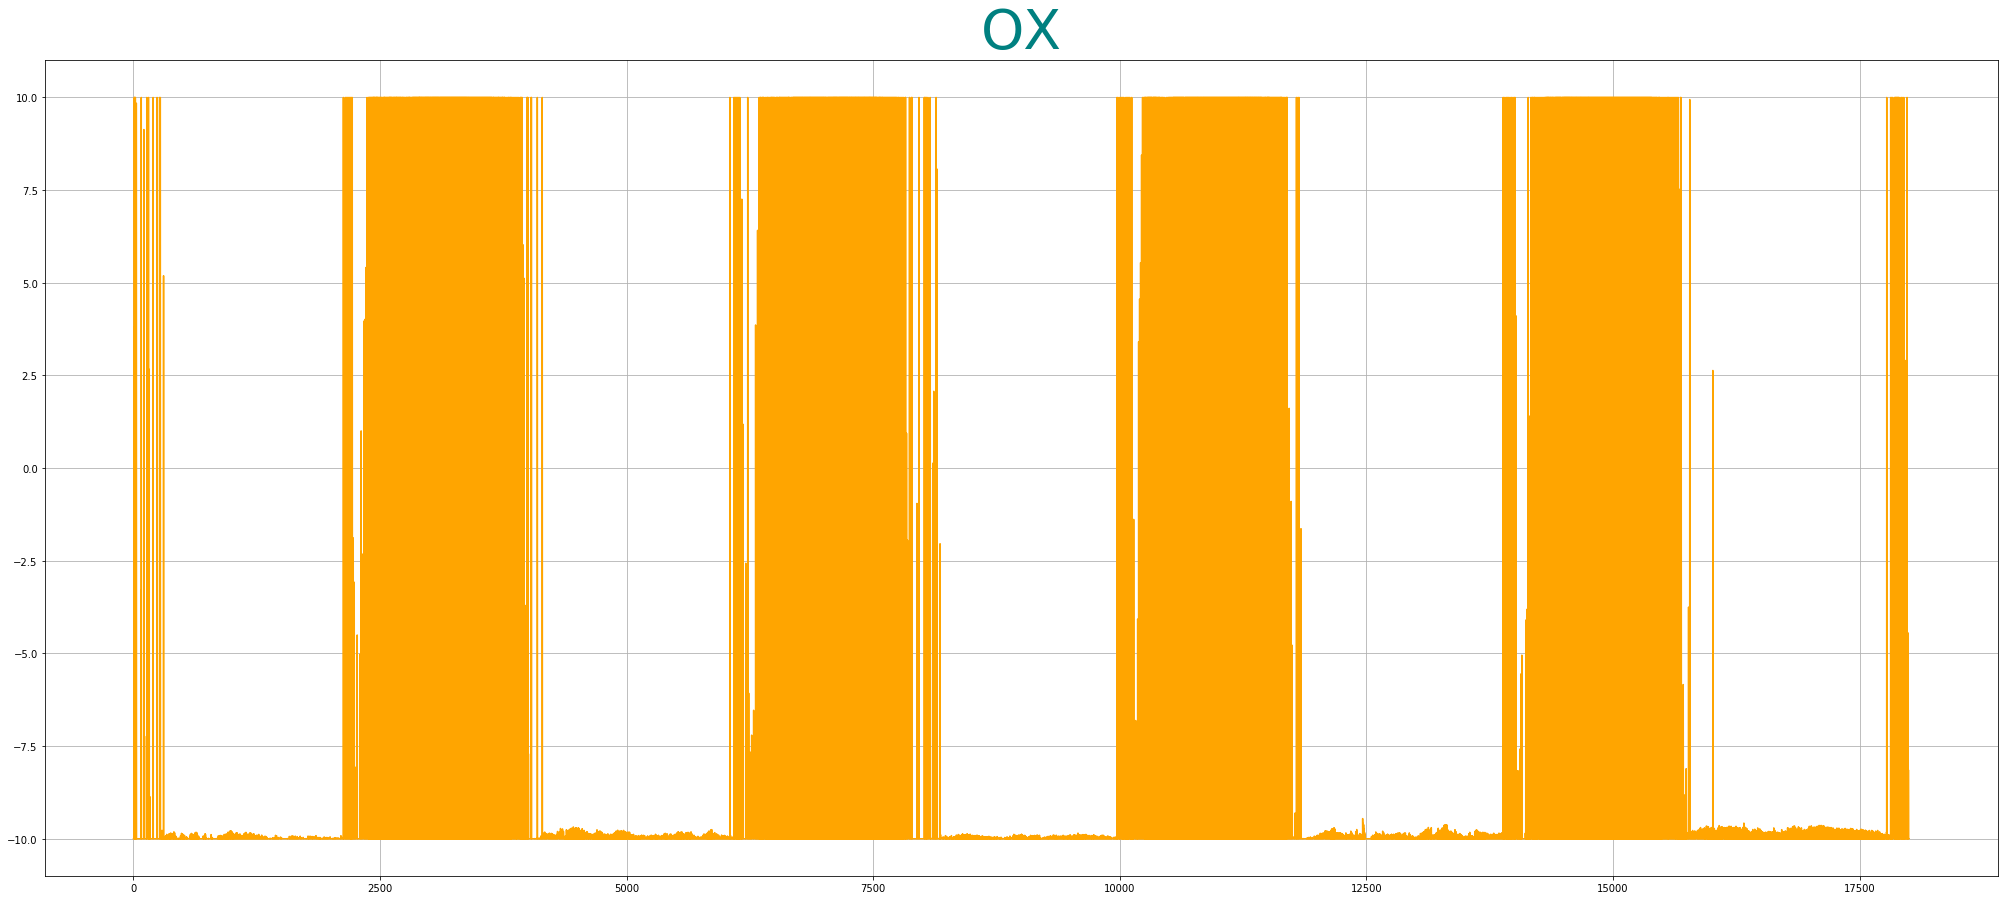

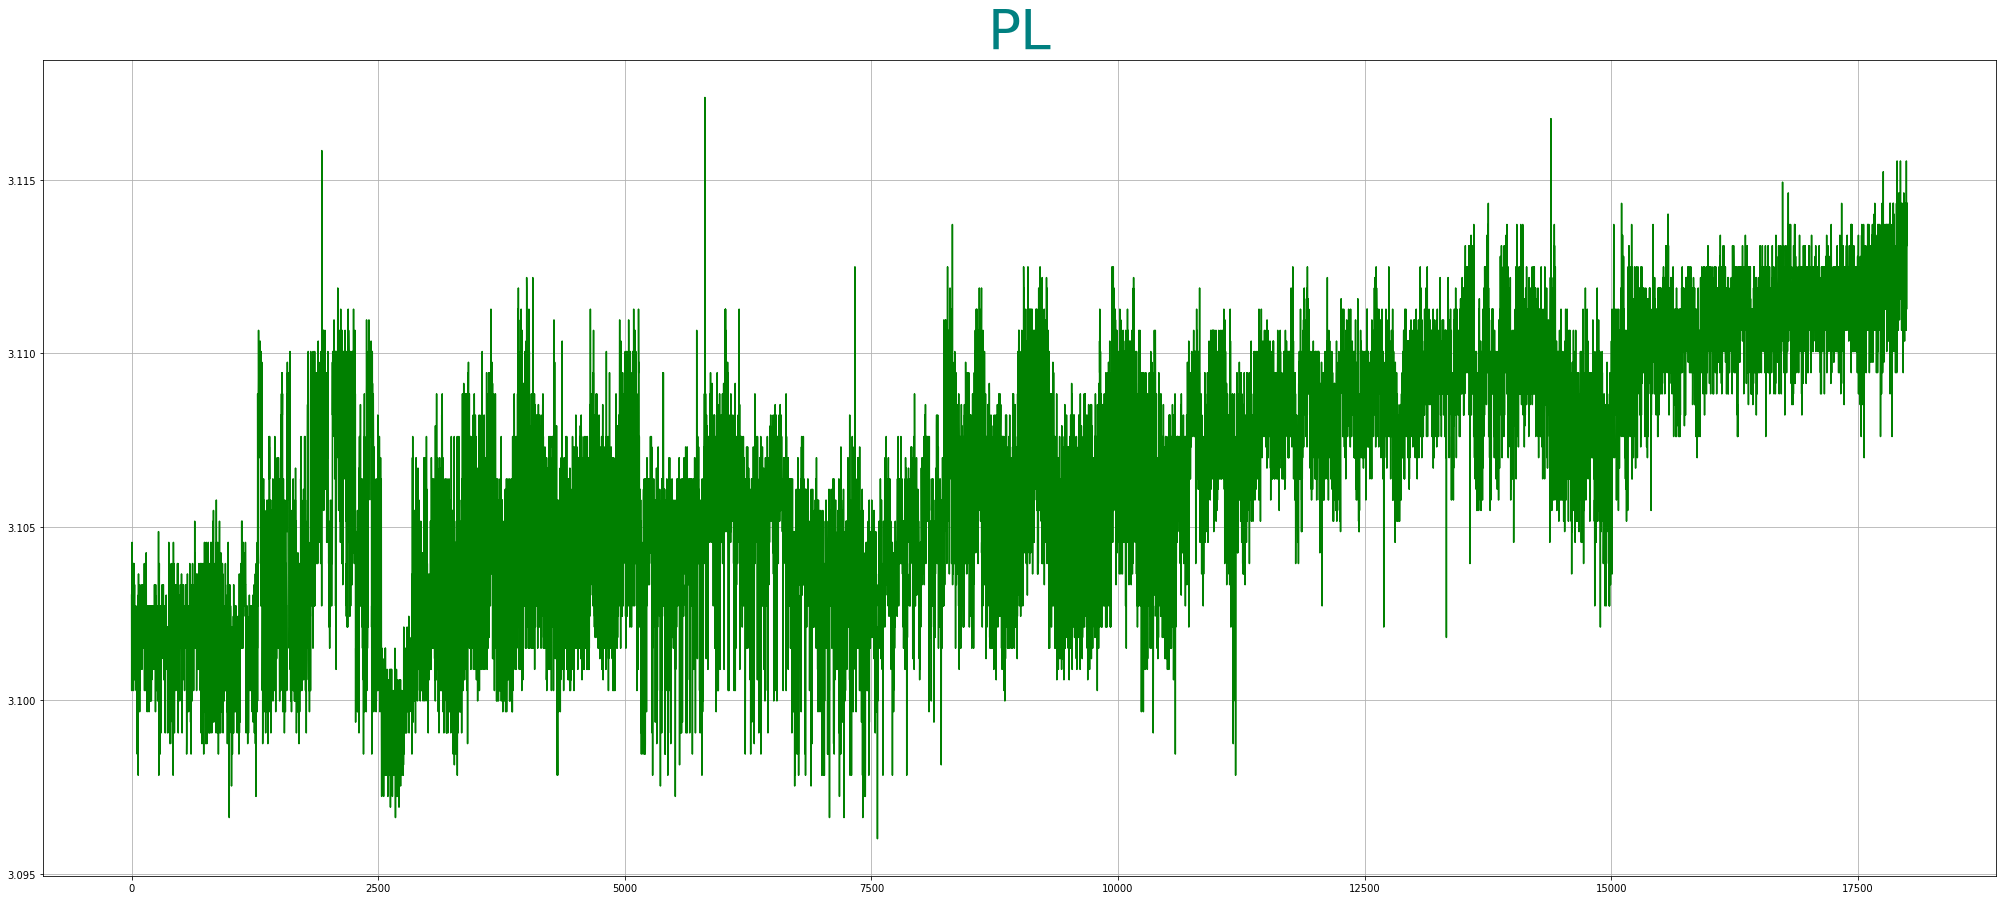

In [69]:
def abre(path, file_name):
    data = np.loadtxt(path+file_name, delimiter='\t', dtype='str')
    data = data[:-1,:-1].T.astype('float') #Elimina la última fila y columna que no contienen nada
    
    return data

path = '/home/edu/Documentos/GitHub/MCIB-19-P-Edu/data/P1/' #Cambiar dependiendo de la compu
file = 'Apnea1.txt'


signals = abre(path,file)

PL = signals[0]
EKG = signals[1]
OX = signals[2]
EMG = signals[3]


plt.figure('EKG',figsize=(35,15))
plt.plot(EKG, 'm')
plt.grid()
plt.title('EKG', size=(55)).set_color(color='hotpink')

plt.figure('EMG', figsize=(35,15))
plt.title('EMG', size=(55)).set_color(color='teal')
plt.plot(EMG, 'b')
plt.grid()

plt.figure('OX', figsize=(35,15))
plt.title('OX', size=(55)).set_color(color='teal')
plt.plot(OX, color = 'orange')
plt.grid()

plt.figure('PL', figsize=(35,15))
plt.title('PL', size=(55)).set_color(color='teal')
plt.plot(PL, 'g')
plt.grid()

plt.show()


In [3]:
def dB(x):
    return 20*np.log10(np.abs(x))

In [4]:
# Primer punto de primer Actividad 
def compfft(signal):
    s_f = fft(signal) # fft de la señal original
    #Obtenemos las ventanas hanning, gaussiana, exponencial y chevy
    wh = hann(signal.shape[0])
    wg = gaussian(signal.shape[0],0.5)
    we = exponential(signal.shape[0])
    wb = chebwin(signal.shape[0],100)
    #Multiplicacion de ventana por la señal
    Eh = wh*signal 
    Eg = wg*signal
    Ee = we*signal
    Eb = wb*signal
    #Decibeles
    Fh = dB(fft(Eh))
    Fg = dB(fft(Eg))
    Fe = dB(fft(Ee))
    Fb = dB(fft(Eb))
    #Graficas fft's
    plt.figure('FFT',figsize=(10,5))
    plt.title('FFT', fontsize=55).set_color(color='red')
    plt.grid()
    #plt.plot(s_f[2:len(s_f)//2], 'k')
    plt.plot(Fh[2:len(Fh)//2], 'm')
    plt.plot(Fg[2:len(Fg)//2], 'b')
    plt.plot(Fe[2:len(Fe)//2], 'r')
    plt.plot(Fb[2:len(Fb)//2], 'g')
    plt.xlabel('Frecuencia en muestras', fontsize=50).set_color(color='white')


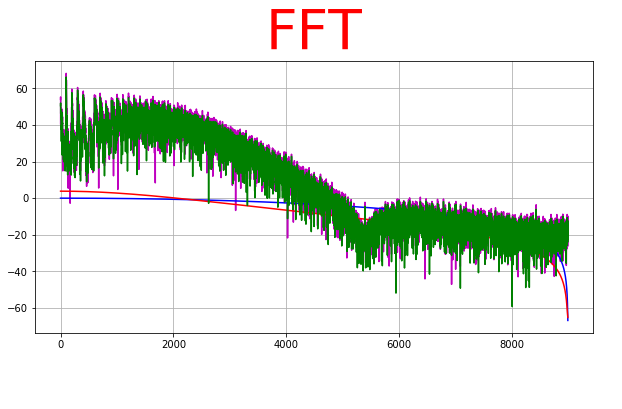

In [5]:
compfft(EKG)



In [6]:
'''
Segundo punto de la primera actividad
Estimación del PSD con el algoritmo de Welch
'''
def periodograma(signal, L, traslape):
    signal = list(signal)
    num = len(signal)//L
    T = int((1-traslape) * L)
    temp = 0 #Mueve el slice
    temp1 = []#Guarda valores
    for s in range(num):
        p = signal[temp:temp+L]
        temp1 += p
        temp += T
    
    p = np.array(temp1).reshape(s+1,L)
    p_f = fft(p).mean(axis=0)
    return dB(p_f)

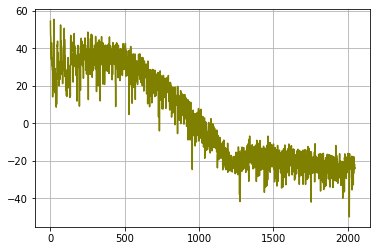

In [7]:
psd = periodograma(EKG, 2**12, .25)
plt.plot(psd[:psd.shape[0]//2],color='olive')
plt.grid()
plt.show()

In [55]:
# Tercer punto de pimer actividad Funcion para evaluar la respuesta en frecuencia de cualquier filtro
# diseñamos un filtro pasa banda butterworth de N orden
def butterbp(cutoff, cutoff2, fs, order):
    Fc1 = np.array([cutoff, cutoff2])*2/fs
    b, a = signal.butter(order, Fc1 , btype='bandpass', analog=False)

    w, h = signal.freqz(b, a)
    fig = plt.figure()
    plt.title('Digital filter frequency response')
    ax1 = fig.add_subplot(111)

    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [rad/sample]')

    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    plt.plot( w,angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
    plt.grid()
    plt.axis('tight')
    plt.show()
    
    return b, a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


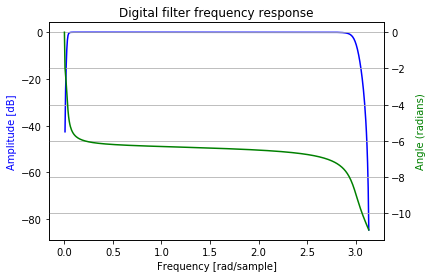

(array([ 0.8279713 ,  0.        , -2.48391389,  0.        ,  2.48391389,
         0.        , -0.8279713 ]),
 array([ 1.        , -0.25117205, -2.59346724,  0.41050282,  2.29207003,
        -0.17219139, -0.68553598]))

In [56]:
butterbp(1,95,200,3)

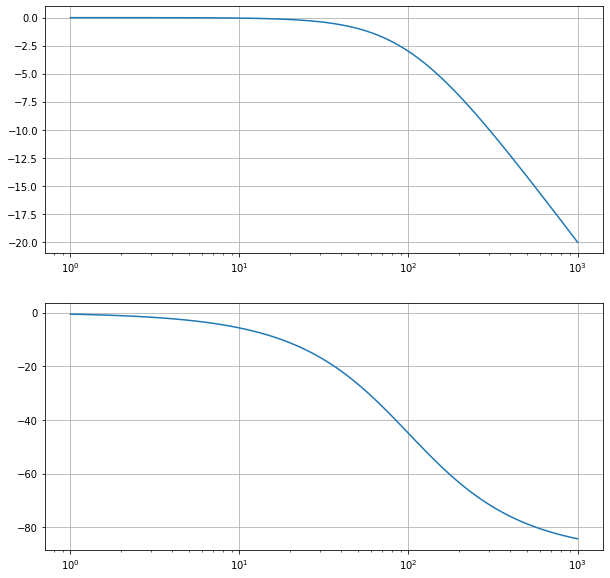

In [10]:
# creando el filtro desde cero dando valores a: a y b
sys1 = signal.lti(1, [1 / 100, 1]) # Creamos el sistema pasabajas primer orden
w, mag, phase = signal.bode(sys1) # Diagrama de bode: frecuencias, magnitud y fase
fig, axs= plt.subplots(2, 1, figsize=(10, 10))
axs[0].semilogx(w, mag) # Ejes logaritmicos
axs[1].semilogx(w, phase) 
axs[0].grid()
axs[1].grid()

In [12]:
# Cuarto punto PROMEDIO MÓVIL sin traslape NO ACABADO

# def prommov(N, señal, r,sr):
#    t = np.linspace (señal.shape[0]/N/(1-r))
#    t = t*sr*(1-r)
#    for i,j in zip(t[:-1],[1:]):
          

In [13]:
EKG_PM = prommov(20,EKG)
plt.plot(EKG_PM)

NameError: name 'prommov' is not defined

In [14]:
# Quinto punto de la primer actividad
# quitaremos tendencia de EKG

def inversa(signal):
    y = signal[np.newaxis].T
    x = np.arange(len(y))[:,np.newaxis]
    x0 = np.ones( (x.shape[0],1) )
    xf = np.concatenate( (x, x0), axis=1)
    w = np.dot( np.linalg.inv( np.dot( xf.T,xf ) ), np.dot( xf.T,y ) )

# corte de ventanas de la señal 
def corte(signal, L):
    t = np.arange(signal.shape[0]//L)*L
    #t = np.linspace(0,signal.shape[0],signal.shape[0]//L).astype('int')
    return t



In [16]:
c = corte(EKG,1000)
b = [EKG[i:i+1000] for i in c]
b = np.array(b)
b.shape

(18, 1000)

In [17]:
inversa(EKG)

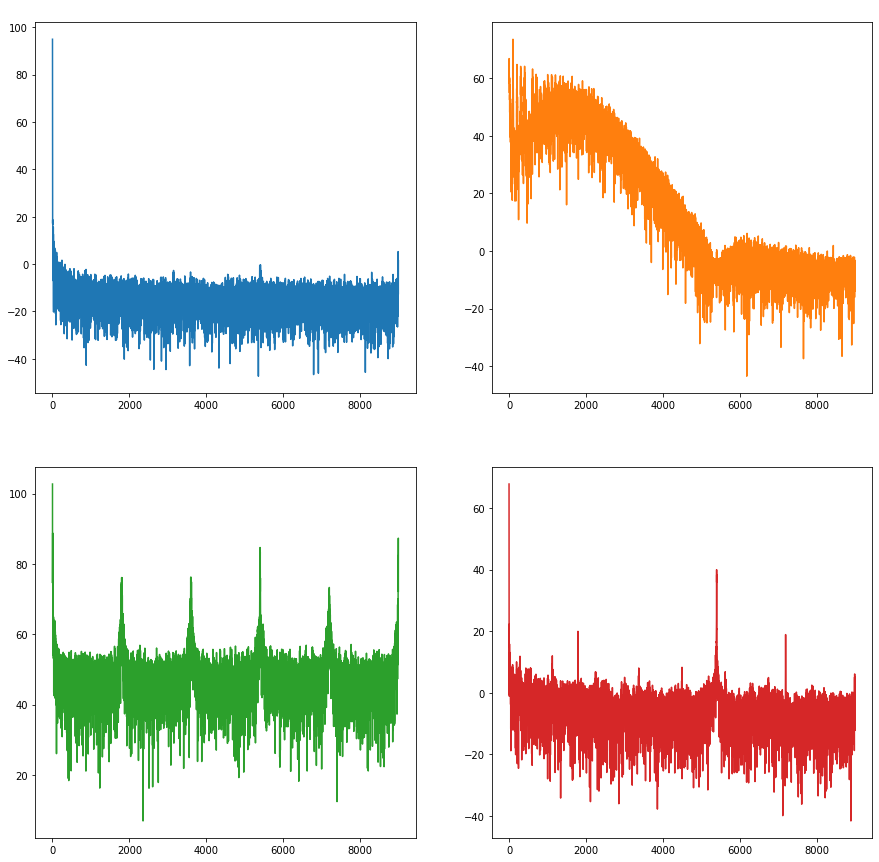

In [18]:
# Primer punto de segunda actividad 
# Estimar el espectro con FFT

fig, axs = plt.subplots (2, 2, figsize = (15,15))
axs[0, 0].plot( dB( fft( PL ) ) [:len(PL)//2] )
axs[0, 0].set_title('Espectro de Pletismografia').set_color(color='white')
axs[0, 1].plot( dB( fft( EKG ) ) [:len(EKG)//2], 'tab:orange')
axs[0, 1].set_title('Espectro de EKG').set_color(color='white')
axs[1, 0].plot( dB( fft( OX ) ) [:len(OX)//2], 'tab:green')
axs[1, 0].set_title('Espectro de Oximetria').set_color(color='white')
axs[1, 1].plot( dB( fft( EMG ) ) [:len(EMG)//2], 'tab:red')
axs[1, 1].set_title('Espectro de EMG').set_color(color='white')

# Estimacion con PSD
def periodograma(signal, L, traslape):
    signal = list(signal)
    num = len(signal)//L
    T = int((1-traslape) * L)
    temp = 0 #Mueve el slice
    temp1 = []#Guarda valores
    for s in range(num):
        p = signal[temp:temp+L]
        temp1 += p
        temp += T
    
    p = np.array(temp1).reshape(s+1,L)
    p_f = fft(p).mean(axis=0)
    return dB(p_f)



'\nPara todas las gráficas se tienen que quitar las bajas frecuencias\n'

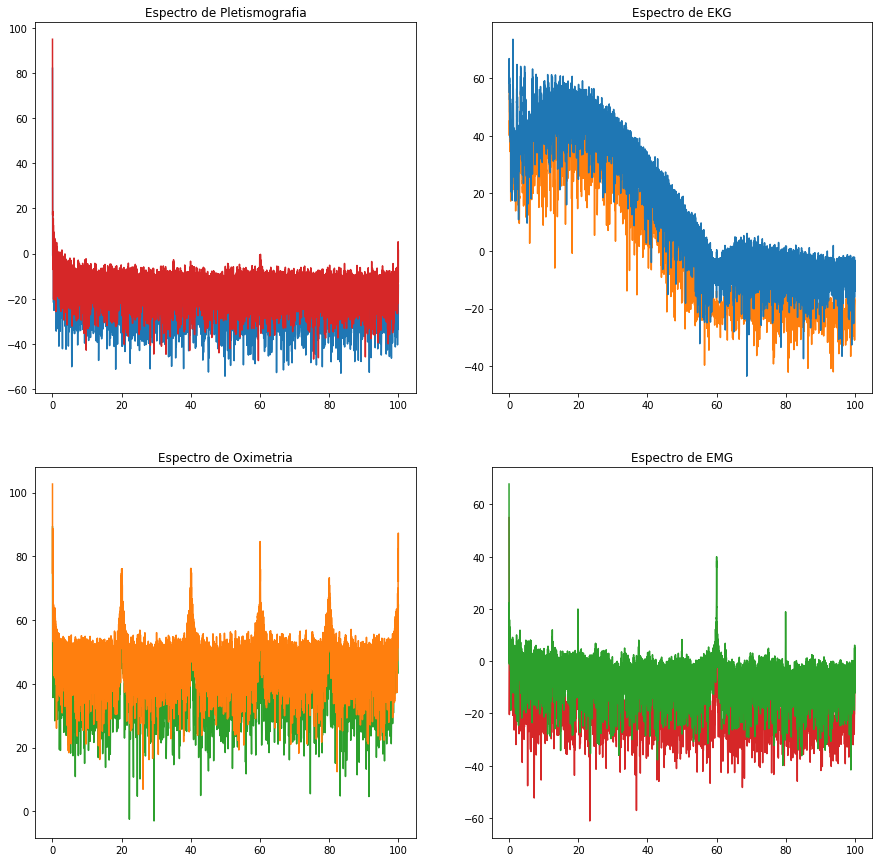

In [20]:
L = 2**12

psd_PL = periodograma(PL,L,.75)
psd_EKG = periodograma(EKG,L,.75)
psd_OX = periodograma(OX,L,.75)
psd_EMG = periodograma(EMG,L,.75)

w = np.linspace(0,100,psd_PL.shape[0]//2)
W = np.linspace(0,100, dB(fft(PL)).shape[0]//2)

fig, axs = plt.subplots (2, 2, figsize = (15,15))
axs[0, 0].plot(w, psd_PL[:L//2] )
axs[0, 0].set_title('Espectro de Pletismografia')
axs[0, 1].plot(w, psd_EKG[:L//2], 'tab:orange')
axs[0, 1].set_title('Espectro de EKG')
axs[1, 0].plot(w, psd_OX[:L//2], 'tab:green')
axs[1, 0].set_title('Espectro de Oximetria')
axs[1, 1].plot(w, psd_EMG[:L//2], 'tab:red')
axs[1, 1].set_title('Espectro de EMG')

axs[0, 0].plot(W, dB( fft( PL ) ) [:len(PL)//2], 'tab:red' )
axs[0, 0].set_title('Espectro de Pletismografia')
axs[0, 1].plot(W, dB( fft( EKG ) ) [:len(EKG)//2], 'tab:blue')
axs[0, 1].set_title('Espectro de EKG')
axs[1, 0].plot(W, dB( fft( OX ) ) [:len(OX)//2], 'tab:orange')
axs[1, 0].set_title('Espectro de Oximetria')
axs[1, 1].plot(W, dB( fft( EMG ) ) [:len(EMG)//2], 'tab:green')
axs[1, 1].set_title('Espectro de EMG')

# Falta ajustar las gráficas 
'''
Para todas las gráficas se tienen que quitar las bajas frecuencias
'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


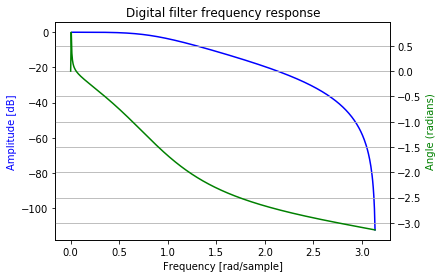

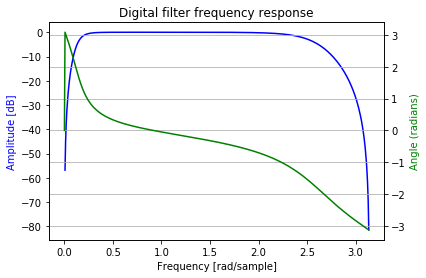

Text(0.5, 1.0, 'Electromiografía')

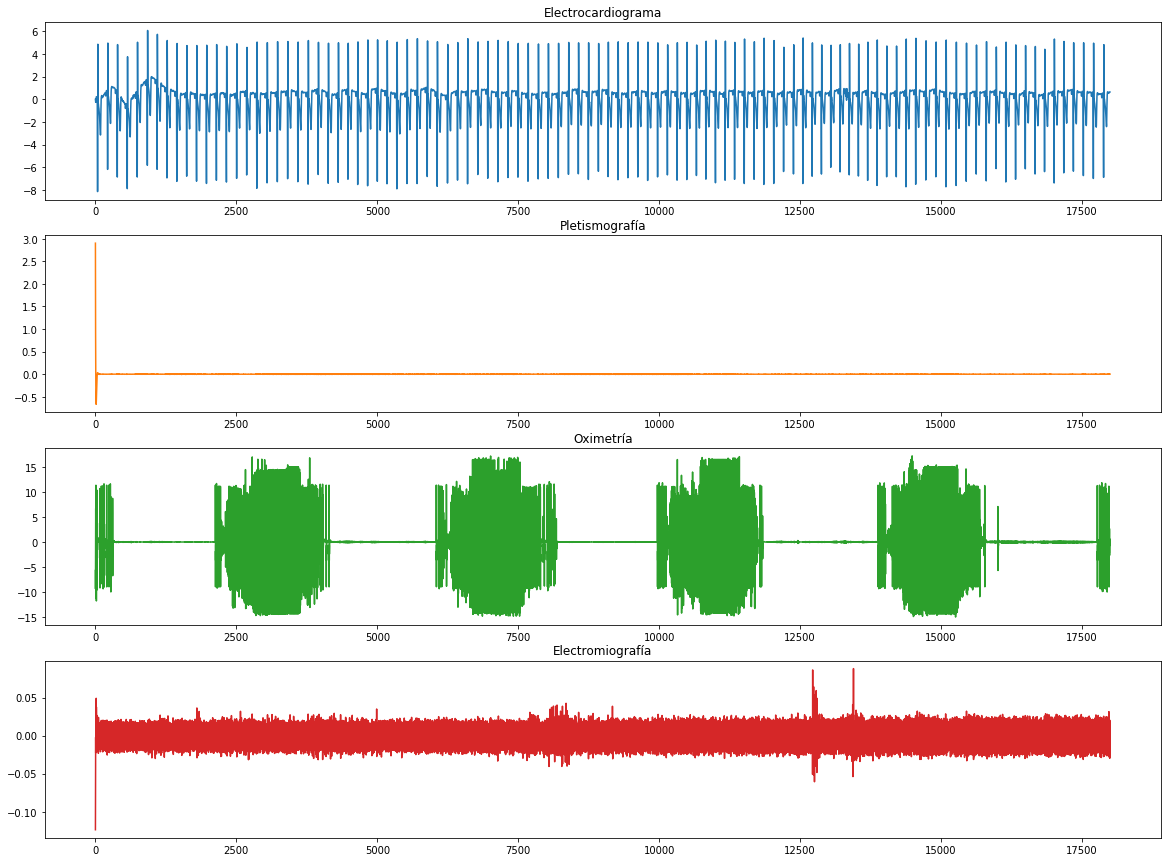

In [68]:
# Punto número dos de la actividad dos 
#Se va a filtrar el Oxi, Pletis, EMG y EKG con un filtro Butter pasa altas y pasa banda, orden 3
b1, a1 = butterbp(0.1, 30, 200, 2) #Este filtro se va a usar para el EKG
b2, a2 = butterbp(5, 80, 200, 2) #Para el resto de las señales 

EKG1 = signal.lfilter(b1,a1,EKG)
PLET1 = signal.lfilter(b2, a2, PL)
OXI1 = signal.lfilter(b2, a2, OX)
EMG1 = signal.lfilter(b2, a2, EMG)

# graficamos las señales filtradas 
fig, axs = plt.subplots (4, 1, figsize = (20,15))
axs[0].plot(EKG1)
axs[0].set_title('Electrocardiograma')
axs[1].plot(PLET1[1:] , 'tab:orange')
axs[1].set_title('Pletismografía')
axs[2].plot(OXI1, 'tab:green')
axs[2].set_title('Oximetría')
axs[3].plot(EMG1[1:], 'tab:red')
axs[3].set_title('Electromiografía')


In [60]:
help(signal.lfilter)

Help on function lfilter in module scipy.signal.signaltools:

lfilter(b, a, x, axis=-1, zi=None)
    Filter data along one-dimension with an IIR or FIR filter.
    
    Filter a data sequence, `x`, using a digital filter.  This works for many
    fundamental data types (including Object type).  The filter is a direct
    form II transposed implementation of the standard difference equation
    (see Notes).
    
    Parameters
    ----------
    b : array_like
        The numerator coefficient vector in a 1-D sequence.
    a : array_like
        The denominator coefficient vector in a 1-D sequence.  If ``a[0]``
        is not 1, then both `a` and `b` are normalized by ``a[0]``.
    x : array_like
        An N-dimensional input array.
    axis : int, optional
        The axis of the input data array along which to apply the
        linear filter. The filter is applied to each subarray along
        this axis.  Default is -1.
    zi : array_like, optional
        Initial conditions for th